# Keras API Project

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Info about various columns**

In [40]:
data_info=pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [41]:
data_info.head(2)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...


**To print Description of columns we will  create a function**

In [42]:
data_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [43]:
feat_info=lambda col_name : data_info.loc[col_name]['Description']

In [44]:
feat_info('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [45]:
feat_info('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

# Loading the data

In [46]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [47]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [50]:
df.shape

(396030, 27)

In [209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


**Initial look analysis**

27 columns and 396030 rows, 15 non-numeric features and 12 numeric features present. Nulls are present in more than one features. Target feature is 'loan_status'. Based on the data we have to find whether a person would be able to pay off loans in future or not.

# Exploratory Data Analysis

In [77]:
sns.set_style('darkgrid')

**Let us explore target columns first**

In [182]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [78]:
print(df['loan_status'].isnull().sum())
print(df.groupby('loan_status')['emp_title'].count())

0
loan_status
Charged Off     71730
Fully Paid     301373
Name: emp_title, dtype: int64


C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

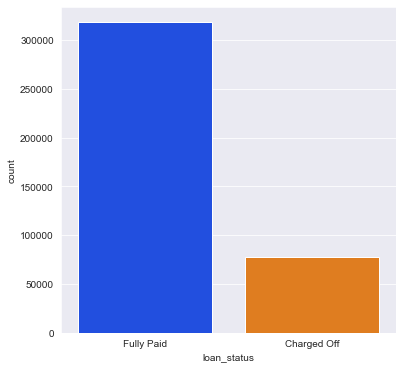

In [79]:
plt.figure(figsize=(6,6))
sns.countplot(df.loan_status, data=df, palette='bright')

In [183]:
#Loan status is non-numeric in nature , we will convert it into dummy variables in future steps

**Fisrt we will try to explore numeric columns**

In [181]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Creating a seaborn heatmap for more clarity**

<AxesSubplot:>

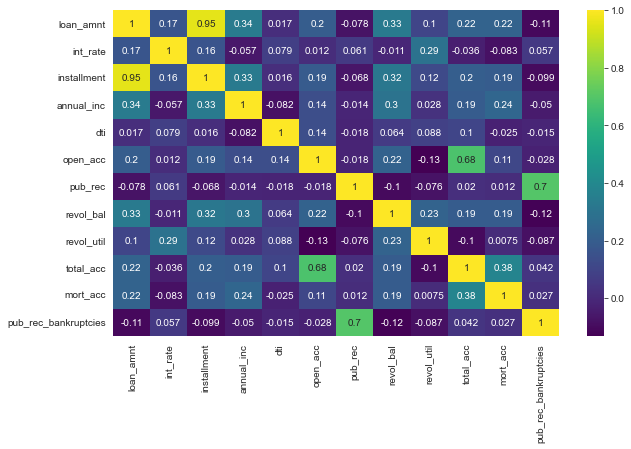

In [184]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**From initial look at heatmap, it seems like installment and loan_amnt columns are highly correlated features**

In [185]:
feat_info('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [186]:
feat_info('installment')

'The monthly payment owed by the borrower if the loan originates.'

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

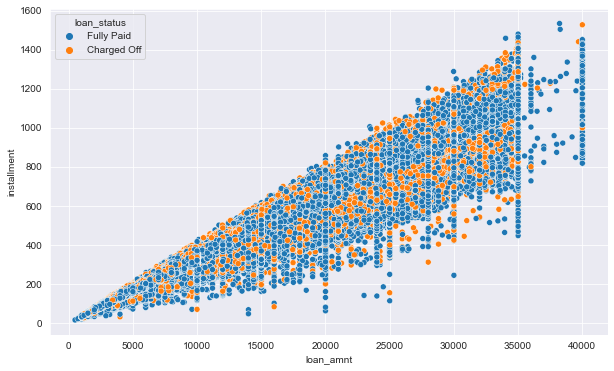

In [187]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='loan_amnt', y='installment', data=df , hue='loan_status')

In [216]:
#strong linear relationship

**loan_amnt column**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

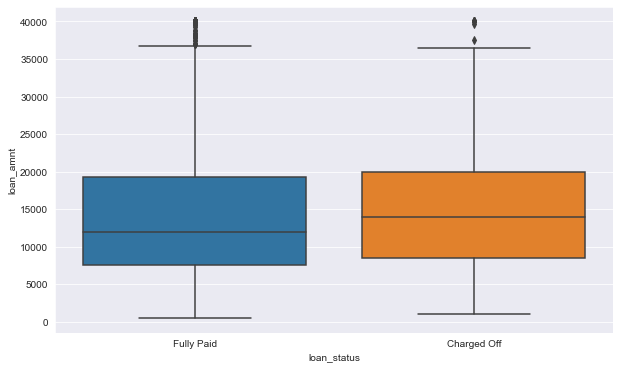

In [207]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df ,)

In [206]:
df.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

**It occurs that the average loan amount is slightly high for people those who are unable to payback in time** (Not Significant though)

**int_rate**

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

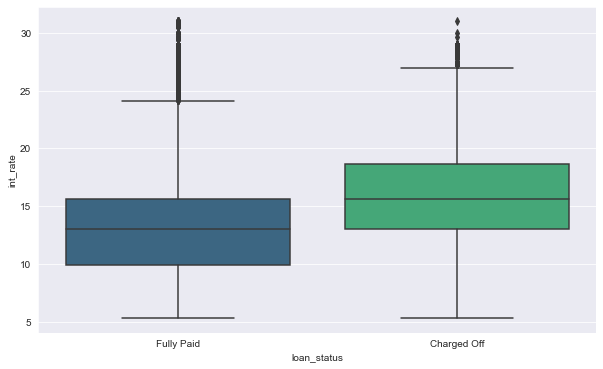

In [213]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='int_rate', data=df, palette='viridis')

In [214]:
df.groupby('loan_status')['int_rate'].mean()

loan_status
Charged Off    15.882587
Fully Paid     13.092105
Name: int_rate, dtype: float64

**Interest rate on an average is less for people who are able pay back**

**installment**

<AxesSubplot:xlabel='installment', ylabel='Count'>

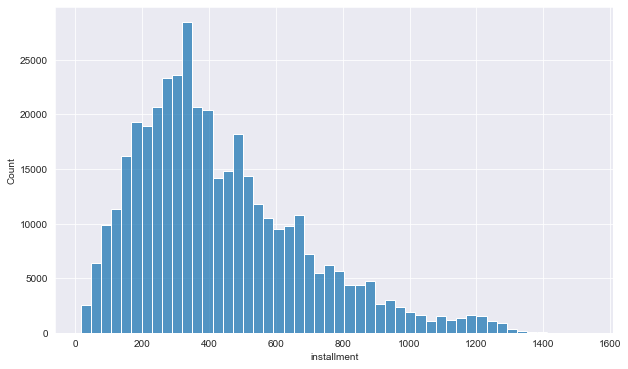

In [224]:
plt.figure(figsize=(10,6))
sns.histplot(df.installment, bins=50)

In [225]:
feat_info('dti')

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [243]:
sorted(df.open_acc.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 76.0,
 90.0]

In [244]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [248]:
df.pub_rec.unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

In [251]:
feat_info('revol_bal')

'Total credit revolving balance'

In [260]:
feat_info('revol_util')

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [261]:
feat_info('total_acc')

"The total number of credit lines currently in the borrower's credit file"

In [262]:
df.pub_rec_bankruptcies

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [127]:
feat_info('annual_inc')

'The self-reported annual income provided by the borrower during registration.'

In [126]:
df.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    67535.537710
Fully Paid     75829.951566
Name: annual_inc, dtype: float64

In [140]:
df['annual_inc'].sort_values(ascending=False)

308700    8706582.0
318255    7600000.0
100370    7446395.0
376306    7141778.0
100946    7000000.0
            ...    
127390       4000.0
72405        4000.0
7011         2500.0
350865        600.0
285674          0.0
Name: annual_inc, Length: 396030, dtype: float64

In [179]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [180]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

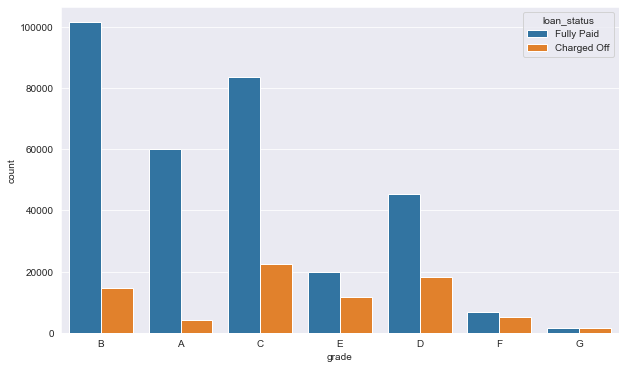

In [265]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

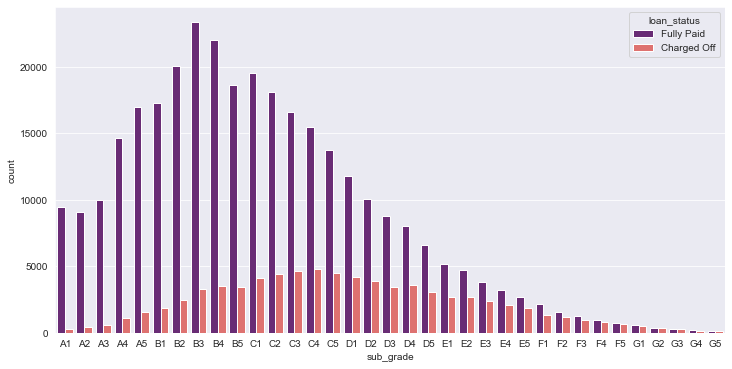

In [269]:
plt.figure(figsize=(12,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='magma',hue='loan_status' )

 It looks like F and G subgrades don't get paid back that often

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

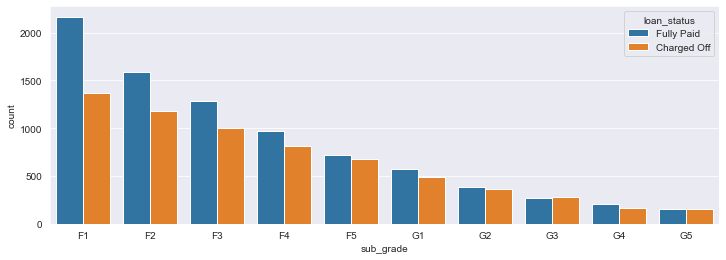

In [270]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**Mapping loan_status values as binary 0 and 1**

In [271]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [272]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [273]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


#Bar plot showing the correlation of the numeric features to the new loan_repaid column. 

In [283]:
df.corr()['loan_repaid'].sort_values(ascending=False)[1:]

mort_acc                0.073111
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009383
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082373
int_rate               -0.247758
Name: loan_repaid, dtype: float64

<AxesSubplot:>

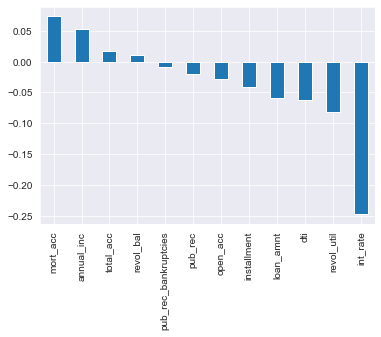

In [290]:
df.corr()['loan_repaid'].sort_values(ascending=False)[1:].plot(kind='bar')

# Data PreProcessing

**Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

In [292]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [293]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [294]:
#Since we have mapped loan_status column, dropping it from original dataset

df.drop('loan_status',axis=1,inplace=True)

In [296]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Dealing with missing data**

In [ ]:
#Data missing in terms of percentage

In [309]:
(df.isnull().sum()* 100)/ len(df)


loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [313]:
0.095*len(df)


37622.85

In [317]:
#mort_acc approx 37622 rows data missing, can't drop 

print(feat_info('mort_acc'))

Number of mortgage accounts.


In [319]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [325]:
print("Mean of mort_acc column per sub_grade")
mort_acc_new=df.groupby('sub_grade')['mort_acc'].mean().round()
mort_acc_new

Mean of mort_acc column per sub_grade


sub_grade
A1    3.0
A2    2.0
A3    2.0
A4    2.0
A5    2.0
B1    2.0
B2    2.0
B3    2.0
B4    2.0
B5    2.0
C1    2.0
C2    2.0
C3    2.0
C4    2.0
C5    2.0
D1    2.0
D2    2.0
D3    2.0
D4    2.0
D5    2.0
E1    2.0
E2    2.0
E3    2.0
E4    2.0
E5    2.0
F1    2.0
F2    2.0
F3    2.0
F4    2.0
F5    2.0
G1    2.0
G2    2.0
G3    2.0
G4    2.0
G5    2.0
Name: mort_acc, dtype: float64

In [326]:
def fill_mort_acc(sub_grade,mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_new[sub_grade]
    else:
        return mort_acc

In [328]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['sub_grade'], x['mort_acc']), axis=1)

**emp_title has approx 23000 rows data missing**

In [333]:
#5.789*len(df)
#2292617.67/100= 22926

In [334]:
feat_info('emp_title')

'The job title supplied by the Borrower when applying for the loan.*'

In [337]:
df.emp_title.describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**


In [338]:

df.drop('emp_title', axis=1, inplace=True)

**emp_length has almost 18300 rows data missing**

In [342]:
#(4.621*len(df))/100

In [344]:
feat_info('emp_length')

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [364]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

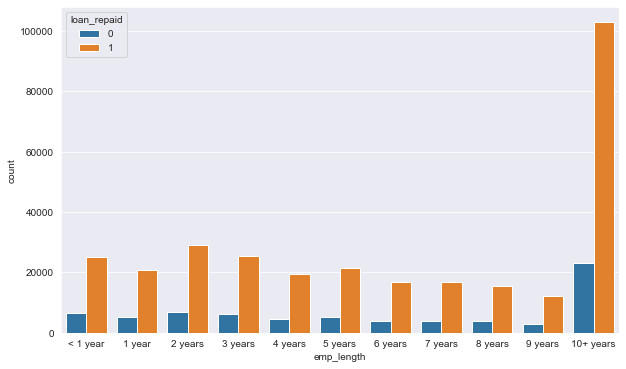

In [367]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, hue='loan_repaid',order=emp_length_order)

In [385]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [388]:
#changing emp_length datatype to numerical

In [391]:
df['emp_length'].replace(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],[10,4,0,6,9,2,3,8,7,5,1],inplace=True)

In [405]:
print('Average Employee length by sub-grade')
print(df.groupby('sub_grade')['emp_length'].mean())

Average Employee length by sub-grade
sub_grade
A1    6.010588
A2    5.880607
A3    5.894061
A4    5.821204
A5    5.913046
B1    6.013129
B2    5.982739
B3    5.935657
B4    5.912095
B5    5.902170
C1    5.880856
C2    5.904536
C3    5.946636
C4    5.984006
C5    5.989097
D1    5.871174
D2    5.890307
D3    5.864512
D4    5.939476
D5    6.012950
E1    5.947047
E2    5.952582
E3    6.016391
E4    6.040852
E5    6.092199
F1    6.065501
F2    5.990967
F3    5.988187
F4    6.109438
F5    6.172876
G1    6.085884
G2    6.117566
G3    6.056711
G4    6.256906
G5    6.291391
Name: emp_length, dtype: float64


In [406]:
#filling missing emp_length data with average emp_length per sub_grade

In [398]:
emp_length_new=df.groupby('sub_grade')['emp_length'].mean()

In [399]:
def fill_emp_length(sub_grade,emp_length):
    if np.isnan(emp_length):
        return emp_length_new[sub_grade]
    else:
        return emp_length

In [400]:
df['emp_length'] = df.apply(lambda x: fill_emp_length(x['sub_grade'], x['emp_length']), axis=1)

In [408]:
#dropping grade column as we already have sub_grade
df.drop('grade',axis=1, inplace= True)

**title**

In [429]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**title**


 The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column

In [419]:
df.drop('title',axis=1, inplace= True)

In [427]:
# Dropping any null values left


In [428]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [433]:
df.dropna(inplace=True)

In [434]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

In [435]:
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**term**

In [437]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [438]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [439]:
df.term.value_counts()

36    301247
60     93972
Name: term, dtype: int64

**sub_grade**

In [443]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [444]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [445]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

**home_ownership**

In [448]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [449]:
#convert NONE , ANY to OTHER

In [450]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')


In [451]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [452]:
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

**verification_status, purpose, initial_list_status, application_type  **

In [454]:
df.verification_status.value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [456]:
df.purpose.value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [459]:
df.initial_list_status.value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [460]:
df.application_type.value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [462]:
dummies_list = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies_list],axis=1)

In [464]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

**issue_d**

In [465]:
#This would be data leakage
df = df.drop('issue_d',axis=1)

**earliest_cr_line**

In [466]:
df.earliest_cr_line

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [467]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

**address**

In [468]:
df.address

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [470]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [471]:
dummies_zip = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies_zip],axis=1)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   emp_length                           395219 non-null  float64
 5   annual_inc                           395219 non-null  float64
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [473]:
df.shape

(395219, 80)

**Finally our data is clean!!**

# Train Test Split

In [475]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [617]:
X_train.shape

(276653, 79)

In [618]:
X_test.shape

(118566, 79)

**Normalize the feature data X_train and X_test**

In [619]:
from sklearn.preprocessing import MinMaxScaler

In [620]:
scaler = MinMaxScaler()

In [621]:
X_train = scaler.fit_transform(X_train)

In [622]:
X_test = scaler.transform(X_test)

In [623]:
X_test

array([[0.35384615, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.        ],
       [0.76923077, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.        ],
       [0.53846154, 1.        , 0.10011687, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71025641, 1.        , 0.65562914, ..., 0.        , 0.        ,
        0.        ],
       [0.48717949, 1.        , 0.6996494 , ..., 0.        , 0.        ,
        0.        ],
       [0.37435897, 0.        , 0.61082976, ..., 1.        , 0.        ,
        0.        ]])

# Creating the Model

In [484]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


In [528]:
79/2

39.5

# Model

In [624]:
#Simple NN
model=Sequential()

In [625]:
#input layer
model.add(Dense(78, activation = 'relu') )

#hidden layer
model.add(Dense(39, activation = 'relu') )

#output layer
model.add(Dense(1, activation = 'sigmoid') )

model.compile(loss='binary_crossentropy', optimizer='adam')

In [626]:
model.fit(x=X_train,
          y=y_train,
         epochs=100,
         batch_size=128,
        validation_data=(X_test, y_test),)

Epoch 1/100
2162/2162 [==============================] - 4s 1ms/step - loss: 0.2799 - val_loss: 0.2693
Epoch 2/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2622 - val_loss: 0.2648
Epoch 3/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2606 - val_loss: 0.2629
Epoch 4/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2590 - val_loss: 0.2617
Epoch 5/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2581 - val_loss: 0.2633
Epoch 6/100
2162/2162 [==============================] - 3s 2ms/step - loss: 0.2575 - val_loss: 0.2611
Epoch 7/100
2162/2162 [==============================] - 3s 2ms/step - loss: 0.2569 - val_loss: 0.2627
Epoch 8/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2566 - val_loss: 0.2630
Epoch 9/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2560 - val_loss: 0.2651
Epoch 10/100
2162/2162 [==============================] - 3s 1ms/step - l

Epoch 80/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2357 - val_loss: 0.2830
Epoch 81/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2356 - val_loss: 0.2834
Epoch 82/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2356 - val_loss: 0.2832
Epoch 83/100
2162/2162 [==============================] - 3s 2ms/step - loss: 0.2353 - val_loss: 0.2837
Epoch 84/100
2162/2162 [==============================] - 4s 2ms/step - loss: 0.2353 - val_loss: 0.2840
Epoch 85/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2351 - val_loss: 0.2860
Epoch 86/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2349 - val_loss: 0.2851
Epoch 87/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2348 - val_loss: 0.2858
Epoch 88/100
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2347 - val_loss: 0.2896
Epoch 89/100
2162/2162 [==============================] - 3s 1ms

In [627]:
losses=pd.DataFrame(model.history.history)

In [628]:
losses

,loss,val_loss
0,0.279947,0.269331
1,0.262249,0.264754
2,0.260575,0.262874
3,0.258990,0.261676
4,0.258065,0.263346
...,...,...
95,0.233879,0.286784
96,0.233594,0.286811
97,0.233638,0.288428
98,0.233469,0.288510


<AxesSubplot:>

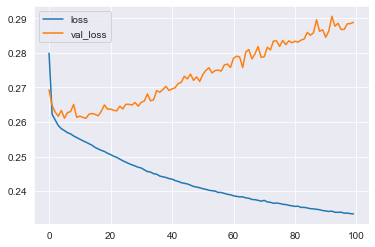

In [629]:
losses[['loss','val_loss']].plot()

In [633]:
from sklearn.metrics import classification_report,confusion_matrix

In [634]:
predictions = model.predict (X_test)

3706/3706 [==============================] - 3s 683us/step


In [635]:
predictions.round()

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [636]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62     23363
           1       0.89      0.98      0.93     95203

    accuracy                           0.88    118566
   macro avg       0.87      0.73      0.77    118566
weighted avg       0.88      0.88      0.87    118566



In [637]:
print (confusion_matrix(y_test,predictions.round()))

[[11438 11925]
 [ 2099 93104]]


In [563]:
#Revamping

In [638]:
model_1=Sequential()

In [639]:
#input layer
model_1.add(Dense(78, activation = 'relu') )

#hidden layer
model_1.add(Dense(39, activation = 'relu') )

#output layer
model_1.add(Dense(1, activation = 'sigmoid') )

model_1.compile(loss='binary_crossentropy', optimizer='adam')

In [640]:
model_1.fit(x=X_train,
          y=y_train,
         epochs=25,
         batch_size=128,
        validation_data=(X_test, y_test),)

Epoch 1/25
2162/2162 [==============================] - 4s 1ms/step - loss: 0.2774 - val_loss: 0.2644
Epoch 2/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2624 - val_loss: 0.2635
Epoch 3/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2605 - val_loss: 0.2627
Epoch 4/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2590 - val_loss: 0.2627
Epoch 5/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2578 - val_loss: 0.2627
Epoch 6/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2573 - val_loss: 0.2618
Epoch 7/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2567 - val_loss: 0.2616
Epoch 8/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2560 - val_loss: 0.2636
Epoch 9/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.2556 - val_loss: 0.2613
Epoch 10/25
2162/2162 [==============================] - 3s 1ms/step - loss: 0.255

In [641]:
predictions_1 = model_1.predict (X_test)

3706/3706 [==============================] - 3s 730us/step


In [642]:
print(classification_report(y_test,predictions_1.round()))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63     23363
           1       0.89      0.98      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.88      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566



In [643]:
print (confusion_matrix(y_test,predictions.round()))

[[11438 11925]
 [ 2099 93104]]


# Model 2

In [644]:
model_2=Sequential()

#input layer
model_2.add(Dense(78, activation = 'relu') )
model_2.add(Dropout(0.2))

#hidden layer
model_2.add(Dense(39, activation = 'relu') )

#output layer
model_2.add(Dense(1, activation = 'sigmoid') )

model_2.compile(loss='binary_crossentropy', optimizer='adam')

In [645]:
model_2.fit(x=X_train,
          y=y_train,
         epochs=25,
         batch_size=64,
        validation_data=(X_test, y_test),)

Epoch 1/25
4323/4323 [==============================] - 7s 1ms/step - loss: 0.2771 - val_loss: 0.2638
Epoch 2/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2614 - val_loss: 0.2624
Epoch 3/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2599 - val_loss: 0.2617
Epoch 4/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2593 - val_loss: 0.2614
Epoch 5/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2587 - val_loss: 0.2614
Epoch 6/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2584 - val_loss: 0.2615
Epoch 7/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2580 - val_loss: 0.2613
Epoch 8/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2577 - val_loss: 0.2616
Epoch 9/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.2574 - val_loss: 0.2611
Epoch 10/25
4323/4323 [==============================] - 6s 1ms/step - loss: 0.257

In [646]:
losses=pd.DataFrame(model_2.history.history)

<AxesSubplot:>

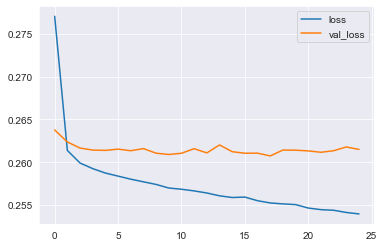

In [647]:
losses[['loss','val_loss']].plot()

In [648]:
predictions_2 = model_2.predict (X_test)

3706/3706 [==============================] - 5s 1ms/step


In [649]:
print(classification_report(y_test,predictions_2.round()))
print (confusion_matrix(y_test,predictions_2.round()))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.91      0.72      0.77    118566
weighted avg       0.89      0.89      0.87    118566

[[10659 12704]
 [  631 94572]]


# Model 3

In [650]:
model_3=Sequential()

#input layer
model_3.add(Dense(78, activation = 'relu') )
model_3.add(Dropout(0.2))

#hidden layer
model_3.add(Dense(39, activation = 'relu') )
model_3.add(Dropout(0.2))

#output layer
model_3.add(Dense(1, activation = 'sigmoid') )

model_3.compile(loss='binary_crossentropy', optimizer='adam')

In [651]:
model_3.fit(x=X_train,
          y=y_train,
         epochs=25,
         batch_size=64,
        validation_data=(X_test, y_test),)

Epoch 1/25
4323/4323 [==============================] - 8s 2ms/step - loss: 0.2795 - val_loss: 0.2633
Epoch 2/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2623 - val_loss: 0.2625
Epoch 3/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2606 - val_loss: 0.2619
Epoch 4/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2599 - val_loss: 0.2615
Epoch 5/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2591 - val_loss: 0.2613
Epoch 6/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2589 - val_loss: 0.2617
Epoch 7/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2584 - val_loss: 0.2614
Epoch 8/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2582 - val_loss: 0.2613
Epoch 9/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.2578 - val_loss: 0.2610
Epoch 10/25
4323/4323 [==============================] - 7s 2ms/step - loss: 0.257

In [652]:
losses=pd.DataFrame(model_3.history.history)


<AxesSubplot:>

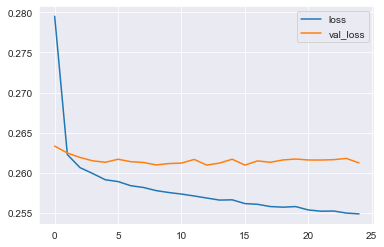

In [653]:
losses[['loss','val_loss']].plot()

In [654]:
predictions_3 = model_3.predict (X_test)

3706/3706 [==============================] - 3s 668us/step


In [655]:
print(classification_report(y_test,predictions_3.round()))
print (confusion_matrix(y_test,predictions_3.round()))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

[[10464 12899]
 [  446 94757]]


# Model 4

In [656]:
model_4=Sequential()

#input layer
model_4.add(Dense(78, activation = 'relu') )
model_4.add(Dropout(0.2))

#hidden layer
model_4.add(Dense(39, activation = 'relu') )
model_4.add(Dropout(0.2))

model_4.add(Dense(18, activation = 'relu') )
model_4.add(Dropout(0.2))


#output layer
model_4.add(Dense(1, activation = 'sigmoid') )

model_4.compile(loss='binary_crossentropy', optimizer='adam')

In [675]:
model_4.fit(x=X_train,
          y=y_train,
         epochs=100,
        validation_data=(X_test, y_test),)

Epoch 1/100
8646/8646 [==============================] - 13s 2ms/step - loss: 0.2560 - val_loss: 0.2624
Epoch 2/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2558 - val_loss: 0.2625
Epoch 3/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2557 - val_loss: 0.2622
Epoch 4/100
8646/8646 [==============================] - 13s 2ms/step - loss: 0.2558 - val_loss: 0.2616
Epoch 5/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2554 - val_loss: 0.2629
Epoch 6/100
8646/8646 [==============================] - 17s 2ms/step - loss: 0.2557 - val_loss: 0.2628
Epoch 7/100
8646/8646 [==============================] - 15s 2ms/step - loss: 0.2556 - val_loss: 0.2629
Epoch 8/100
8646/8646 [==============================] - 16s 2ms/step - loss: 0.2552 - val_loss: 0.2630
Epoch 9/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2554 - val_loss: 0.2623
Epoch 10/100
8646/8646 [==============================] - 14s 2m

8646/8646 [==============================] - 13s 2ms/step - loss: 0.2524 - val_loss: 0.2640
Epoch 80/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2523 - val_loss: 0.2667
Epoch 81/100
8646/8646 [==============================] - 15s 2ms/step - loss: 0.2523 - val_loss: 0.2669
Epoch 82/100
8646/8646 [==============================] - 15s 2ms/step - loss: 0.2524 - val_loss: 0.2646
Epoch 83/100
8646/8646 [==============================] - 15s 2ms/step - loss: 0.2523 - val_loss: 0.2651
Epoch 84/100
8646/8646 [==============================] - 15s 2ms/step - loss: 0.2521 - val_loss: 0.2650
Epoch 85/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2524 - val_loss: 0.2652
Epoch 86/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2523 - val_loss: 0.2665
Epoch 87/100
8646/8646 [==============================] - 14s 2ms/step - loss: 0.2522 - val_loss: 0.2670
Epoch 88/100
8646/8646 [==============================] - 14s 2ms/st

In [676]:
losses=pd.DataFrame(model_4.history.history)


<AxesSubplot:>

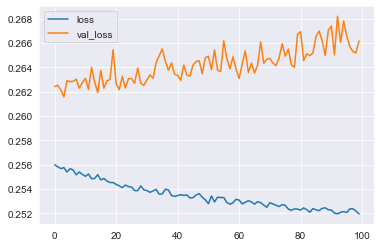

In [677]:
losses[['loss','val_loss']].plot()

In [678]:
predictions_4 = model_4.predict (X_test)

3706/3706 [==============================] - 3s 692us/step


In [679]:
print(classification_report(y_test,predictions_4.round()))
print (confusion_matrix(y_test,predictions_4.round()))


              precision    recall  f1-score   support

           0       0.93      0.47      0.62     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.91      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566

[[10890 12473]
 [  805 94398]]


**Evaluation**

In [680]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
emp_length         4.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 79, dtype: float64

In [681]:
model.predict(new_customer.values.reshape(1,79)).round()

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [682]:
model_1.predict(new_customer.values.reshape(1,79)).round()

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [683]:
model_2.predict(new_customer.values.reshape(1,79)).round()

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [684]:
model_3.predict(new_customer.values.reshape(1,79)).round()

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [685]:
model_4.predict(new_customer.values.reshape(1,79)).round()

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [686]:
df.iloc[random_ind]['loan_repaid']

1.0

**Customer 2**

In [687]:

random_ind_2 = random.randint(0,len(df))

new_customer_2 = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer_2

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
emp_length         4.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 79, dtype: float64

In [688]:
print(model.predict(new_customer_2.values.reshape(1,79)).round())
print(model_1.predict(new_customer_2.values.reshape(1,79)).round())
print(model_2.predict(new_customer_2.values.reshape(1,79)).round())
print(model_3.predict(new_customer_2.values.reshape(1,79)).round())
print(model_4.predict(new_customer_2.values.reshape(1,79)).round())

1/1 [==============================] - 0s 16ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[1.]]
1/1 [==============================] - 0s 14ms/step
[[1.]]
1/1 [==============================] - 0s 14ms/step
[[1.]]
1/1 [==============================] - 0s 14ms/step
[[1.]]


In [689]:
df.iloc[random_ind_2]['loan_repaid']

1.0